In [1]:
## En realidad, antes de hacer todo esto, deberiamos definir el grupo de cada uno. Paara ello podemos hacer una formula con los pesos? 

In [2]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
odor = pd.read_json('Data/odor_prop.json', lines=False, orient='records')

In [4]:
odor.head(3)

,name,level,cid,label,smiles,TPSA,MolLogP,MolWt,ExactMolWt,MolMR,...,Class,Subclass,Intermediate Nodes,Direct Parent,Alternative Parents,Molecular Framework,Substituents,Structure-based description,Ancestors,External Descriptors
0,alliaceous,third,139711,5,CCSC(C)SCC,0.00,2.8386,150.312,150.053692,45.726,...,Thioacetals,Dithioacetals,,Dithioacetals,Sulfenyl compounds Dialkylthioethers Hydrocar...,Aliphatic acyclic compounds,Thioacetal Dialkylthioether Sulfenyl compound...,This compound belongs to the class of organic...,Chemical entities Dialkylthioethers Dithioace...,
1,alliaceous,second,8030,5,C1=CSC=C1,0.00,1.7481,84.143,84.003371,24.319,...,None,None,None,None,None,None,None,None,None,None
2,alliaceous,second,521869,5,CCC(=O)SC,17.07,1.2860,104.174,104.029586,28.813,...,Thiocarboxylic acids and derivatives,Thioesters,,Thioesters,Carbothioic S-esters Sulfenyl compounds Carbo...,Aliphatic acyclic compounds,Carbothioic s-ester Thiocarboxylic acid ester...,This compound belongs to the class of organic...,with the general structure RC(=S)XR' (R=H,alkyl


odor['level'] = odor['level'].map({'first':1 ,'second':1/2, 'third':1/3, 'fourth':1/4, 'fifth':1/5, 'sixth':1/6, 'seventh':1/7, 'eighth':1/8   }) 
odor.head(3)
df=odor[['cid', 'label', 'level', 'name']]
data=df.groupby(['cid','name'])['level'].apply(list)
data
for i in range(10):
    print(data.index[i])
    print(data.to_list()[i])
df2=df.groupby(['cid','name'])['level'].apply(list).groupby('cid').apply(list)

In [4]:
ind_X=odor.columns[5:58]

In [5]:
X = odor[ind_X]
y = odor['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\nlupe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

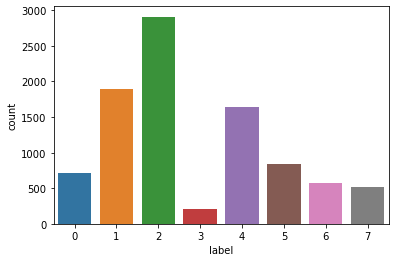

In [6]:
sns.countplot(y_train)

C:\Users\nlupe\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

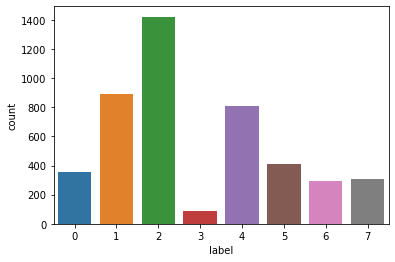

In [7]:
sns.countplot(y_test)

####  All

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [9]:
import warnings
warnings.filterwarnings("ignore")
acc=0
for i in range(len(X_train)):
    a = clf.predict(np.array(X_train.iloc[i]).reshape(1, -1))
    b = y_train.iloc[i]
    if (a==[b]):
        acc+=1
print('Accuracy is:', acc/len(X_train))

Accuracy is: 0.3720404649160568


#### First

In [5]:
odor=odor[odor['level']=='first']
odor.reset_index(drop=True, inplace=True)

In [6]:
mol=odor['cid'].value_counts()
mols=mol.index[mol>1]

In [7]:
mols

Int64Index([   17100,  5357156, 10877566,  6438069, 14614417,      240,
              113007, 71586808,  5352774, 15897831,
            ...
               22311,    75715,  1268142,  5362580,    89385,    27941,
                7799,  9793841,   121777,     8187],
           dtype='int64', length=215)

In [8]:
odor

,name,level,cid,label,smiles,TPSA,MolLogP,MolWt,ExactMolWt,MolMR,...,Class,Subclass,Intermediate Nodes,Direct Parent,Alternative Parents,Molecular Framework,Substituents,Structure-based description,Ancestors,External Descriptors
0,geranium,first,53425201,2,CC1CC2C(C2(C)C)CC1=CCC#N,23.79,3.52858,189.302,189.151750,57.472,...,None,None,None,None,None,None,None,None,None,None
1,geranium,first,6437207,2,CCCCCCCCC(=O)OC/C=C(\C)/CCC=C(C)C,26.30,5.97290,294.479,294.255880,91.374,...,None,None,None,None,None,None,None,None,None,None
2,geranium,first,121777,2,CC1CC(=C)CC(O1)C2=CC=CC=C2,9.23,3.48280,188.270,188.120115,58.104,...,None,None,None,None,None,None,None,None,None,None
3,geranium,first,6429343,2,CC/C=C\CC(=O)C=C,17.07,2.09780,124.183,124.088815,39.252,...,None,None,None,None,None,None,None,None,None,None
4,geranium,first,95401,2,CCCCCCC1OCCC(O1)C,18.46,3.10830,186.295,186.161980,53.663,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,apple,first,287439,1,CC(C)CC(=O)OC1CCCCC1,26.30,2.90840,184.279,184.146330,52.420,...,Fatty Acyls,Fatty acid esters,,Fatty acid esters,Carboxylic acid esters Monocarboxylic acids a...,Aliphatic homomonocyclic compounds,Fatty acid ester Carboxylic acid ester Monoca...,This compound belongs to the class of organic...,Carbonyl compounds Carboxylic acid derivative...,
3631,apple,first,5365069,1,CC/C=C\CCOC(=O)C(C)CC,26.30,2.93200,184.279,184.146330,54.462,...,None,None,None,None,None,None,None,None,None,None
3632,apple,first,5352438,1,CCCC(=O)OCC/C=C\CC,26.30,2.68600,170.252,170.130680,49.915,...,None,None,None,None,None,None,None,None,None,None
3633,apple,first,61177,1,CCCCCCOC=O,26.30,1.73970,130.187,130.099380,36.158,...,Carboxylic acids and derivatives,Carboxylic acid derivatives,,Carboxylic acid esters,Monocarboxylic acids and derivatives Organic ...,Aliphatic acyclic compounds,Carboxylic acid ester Monocarboxylic acid or ...,This compound belongs to the class of organic...,Carbonyl compounds Carboxylic acid derivative...,


In [9]:
groups=[]
for i in range(len(odor)):
    for mol in mols:
        if odor['cid'][i] == mol:
            g=np.max(odor[odor['cid']==mol]['label'])
            groups.append([mol, g])

In [9]:
df=odor

In [11]:
for i in range(len(odor)):
    for mol in groups:
        if (odor['cid'][i] == mol[0]):
            if odor['label'][i]!=mol[1]:
                odor=odor.drop(i)
                odor.reset_index(drop=True, inplace=True)

KeyError: 52

In [13]:
df

,name,level,cid,label,smiles,TPSA,MolLogP,MolWt,ExactMolWt,MolMR,...,Class,Subclass,Intermediate Nodes,Direct Parent,Alternative Parents,Molecular Framework,Substituents,Structure-based description,Ancestors,External Descriptors
0,geranium,first,53425201,2,CC1CC2C(C2(C)C)CC1=CCC#N,23.79,3.52858,189.302,189.151750,57.472,...,None,None,None,None,None,None,None,None,None,None
1,geranium,first,6437207,2,CCCCCCCCC(=O)OC/C=C(\C)/CCC=C(C)C,26.30,5.97290,294.479,294.255880,91.374,...,None,None,None,None,None,None,None,None,None,None
2,geranium,first,121777,2,CC1CC(=C)CC(O1)C2=CC=CC=C2,9.23,3.48280,188.270,188.120115,58.104,...,None,None,None,None,None,None,None,None,None,None
3,geranium,first,6429343,2,CC/C=C\CC(=O)C=C,17.07,2.09780,124.183,124.088815,39.252,...,None,None,None,None,None,None,None,None,None,None
4,geranium,first,95401,2,CCCCCCC1OCCC(O1)C,18.46,3.10830,186.295,186.161980,53.663,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3630,apple,first,287439,1,CC(C)CC(=O)OC1CCCCC1,26.30,2.90840,184.279,184.146330,52.420,...,Fatty Acyls,Fatty acid esters,,Fatty acid esters,Carboxylic acid esters Monocarboxylic acids a...,Aliphatic homomonocyclic compounds,Fatty acid ester Carboxylic acid ester Monoca...,This compound belongs to the class of organic...,Carbonyl compounds Carboxylic acid derivative...,
3631,apple,first,5365069,1,CC/C=C\CCOC(=O)C(C)CC,26.30,2.93200,184.279,184.146330,54.462,...,None,None,None,None,None,None,None,None,None,None
3632,apple,first,5352438,1,CCCC(=O)OCC/C=C\CC,26.30,2.68600,170.252,170.130680,49.915,...,None,None,None,None,None,None,None,None,None,None
3633,apple,first,61177,1,CCCCCCOC=O,26.30,1.73970,130.187,130.099380,36.158,...,Carboxylic acids and derivatives,Carboxylic acid derivatives,,Carboxylic acid esters,Monocarboxylic acids and derivatives Organic ...,Aliphatic acyclic compounds,Carboxylic acid ester Monocarboxylic acid or ...,This compound belongs to the class of organic...,Carbonyl compounds Carboxylic acid derivative...,


In [250]:
odor[odor['cid']==75715]

,name,level,cid,label,smiles,TPSA,MolLogP,MolWt,ExactMolWt,MolMR,...,Class,Subclass,Intermediate Nodes,Direct Parent,Alternative Parents,Molecular Framework,Substituents,Structure-based description,Ancestors,External Descriptors
122,woody,first,75715,2,CCOC1=C(C=CC(=C1)C)O,29.46,2.09932,152.193,152.08373,44.0128,...,None,None,None,None,None,None,None,None,None,None
407,vanilla,first,75715,1,CCOC1=C(C=CC(=C1)C)O,29.46,2.09932,152.193,152.08373,44.0128,...,None,None,None,None,None,None,None,None,None,None


In [237]:
odor['cid'].value_counts()

17100       4
5357156     3
10877566    3
6438069     3
14614417    3
           ..
61988       1
57658745    1
30915       1
32093       1
11514       1
Name: cid, Length: 3388, dtype: int64

In [ ]:
# Para los cid repetidos, nos quedamos con el label más salido.

In [11]:
ind_X=odor.columns[5:58]

In [12]:
X = odor[ind_X]
y = odor['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<AxesSubplot:xlabel='label', ylabel='count'>

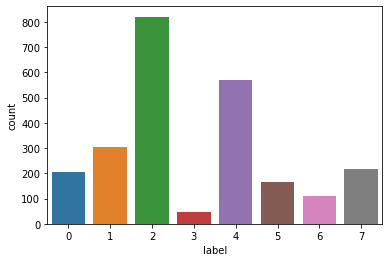

In [13]:
sns.countplot(y_train)

<AxesSubplot:xlabel='label', ylabel='count'>

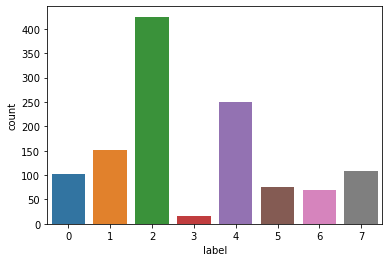

In [14]:
sns.countplot(y_test)

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [16]:
import warnings
warnings.filterwarnings("ignore")
acc=0
for i in range(len(X_train)):
    a = clf.predict(np.array(X_train.iloc[i]).reshape(1, -1))
    b = y_train.iloc[i]
    if (a==[b]):
        acc+=1
print('Accuracy is:', acc/len(X_train))

Accuracy is: 0.48254620123203285


#### Data Augmentation

2    1245
4     820
1     455
7     324
0     308
5     240
6     179
3      64
Name: label, dtype: int64

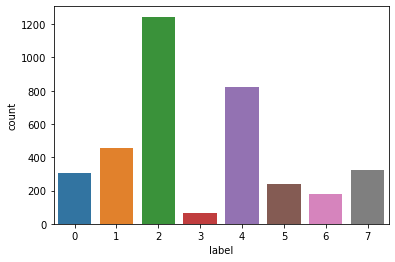

In [17]:
sns.countplot(odor['label'])
odor['label'].value_counts()

In [18]:
ind_X=odor.columns[5:58]

#### Distribution

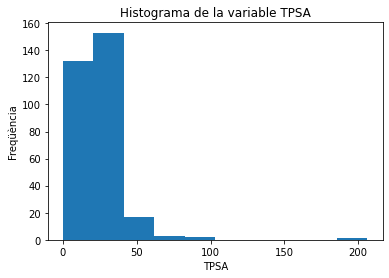

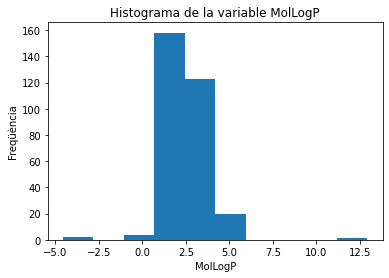

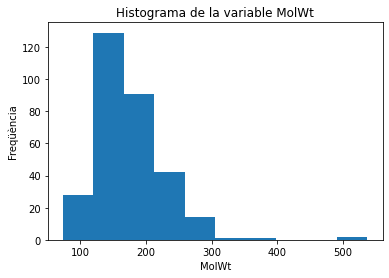

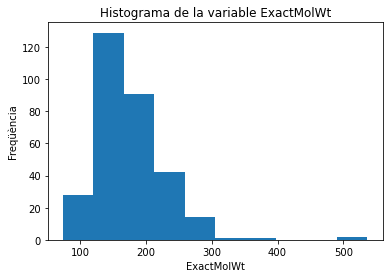

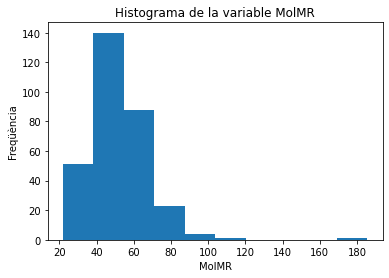

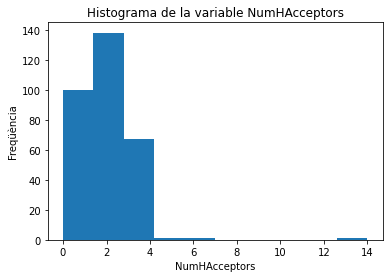

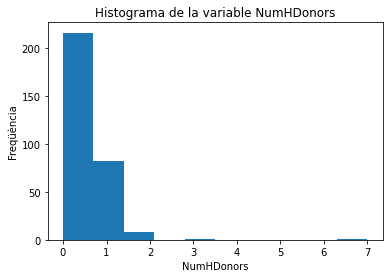

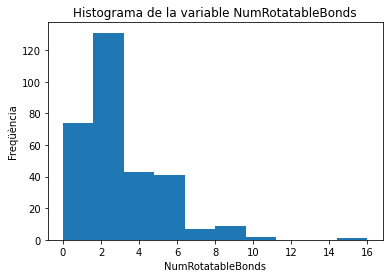

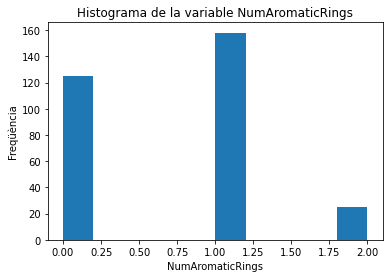

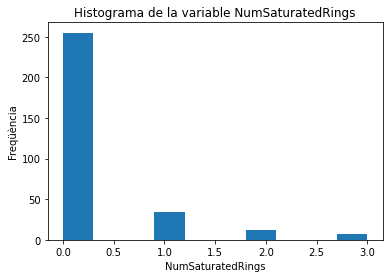

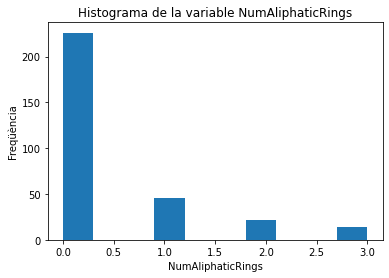

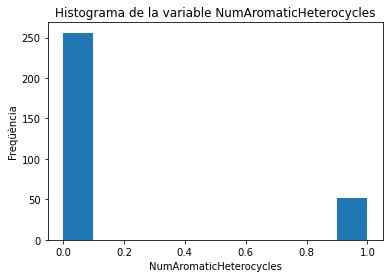

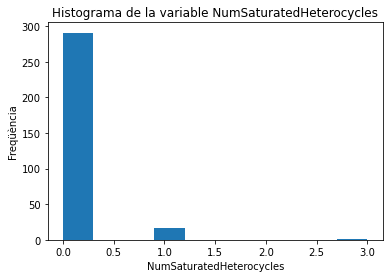

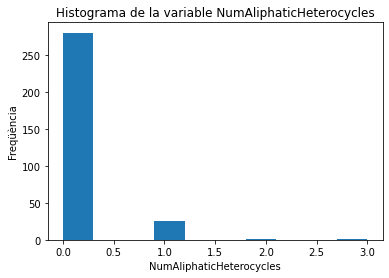

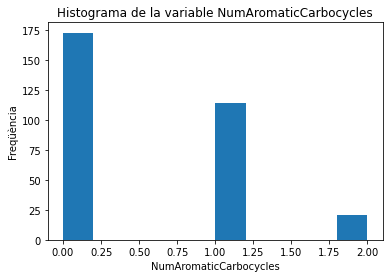

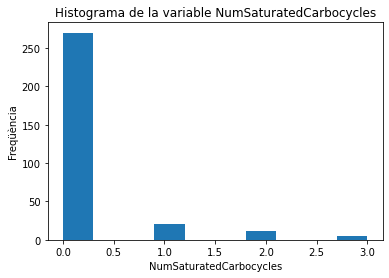

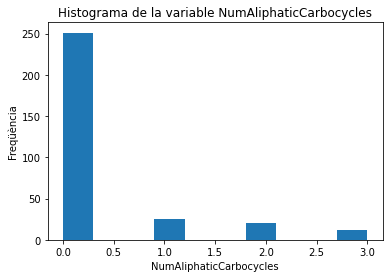

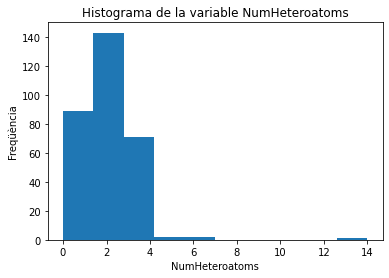

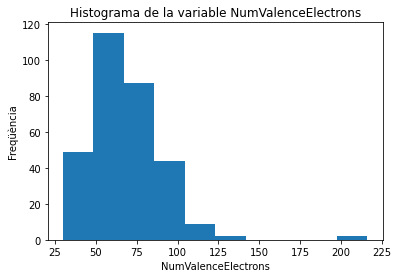

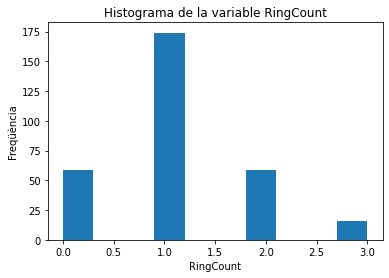

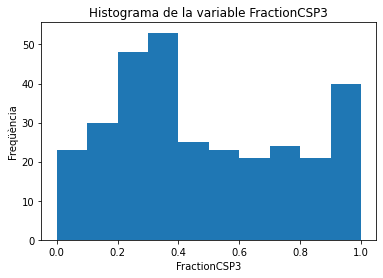

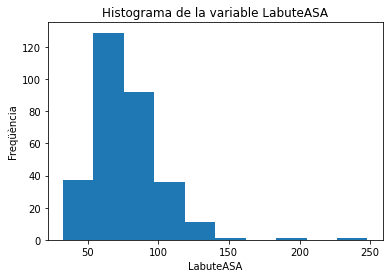

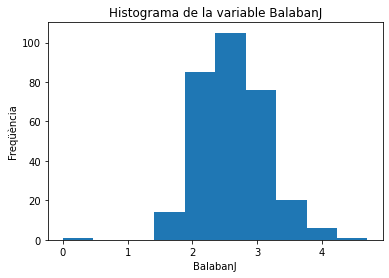

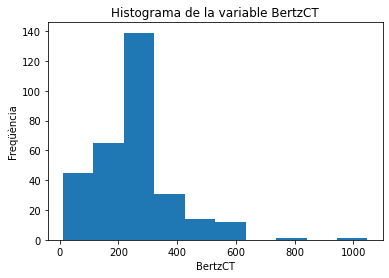

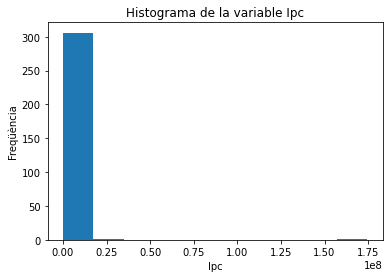

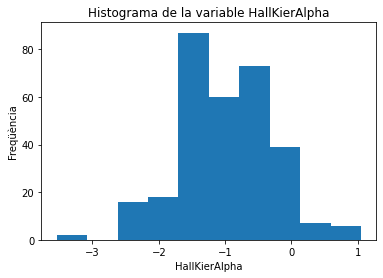

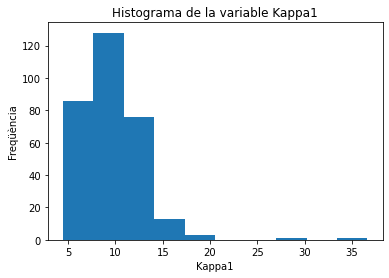

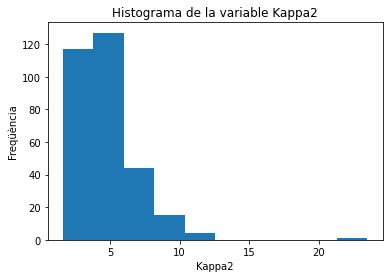

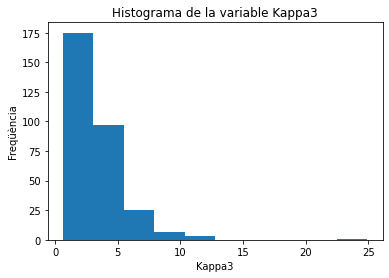

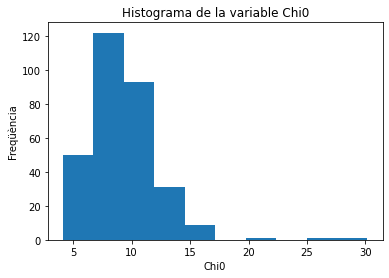

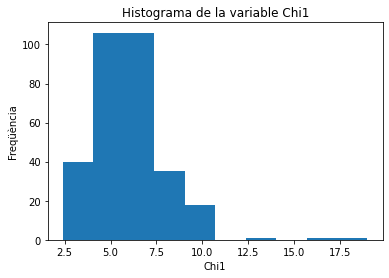

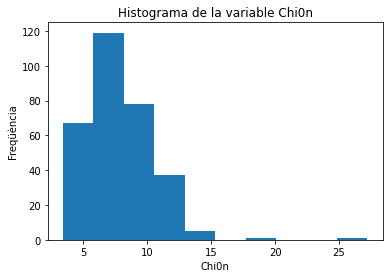

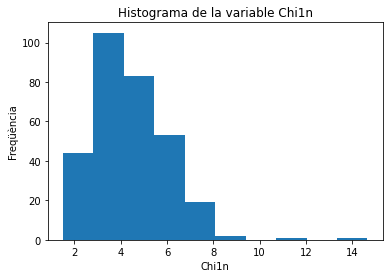

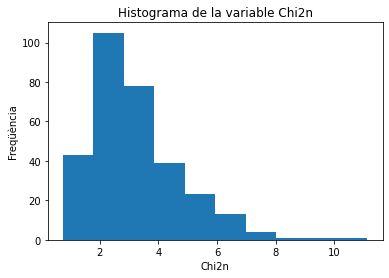

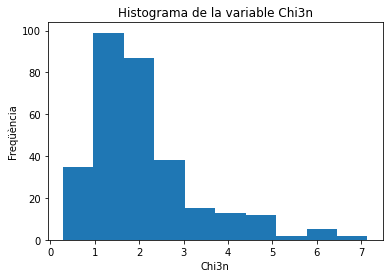

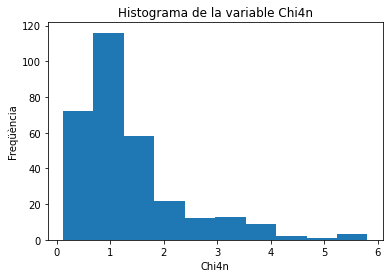

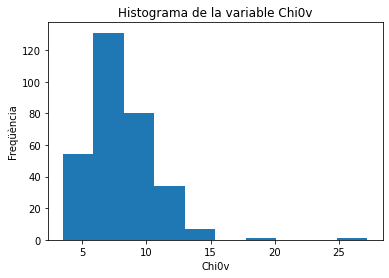

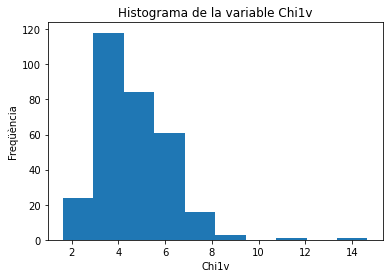

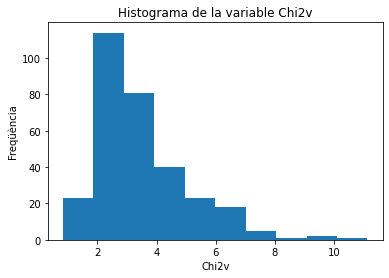

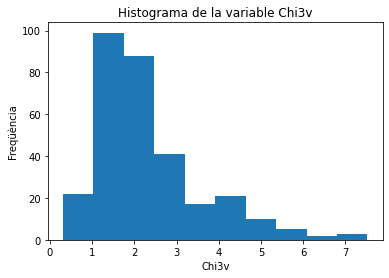

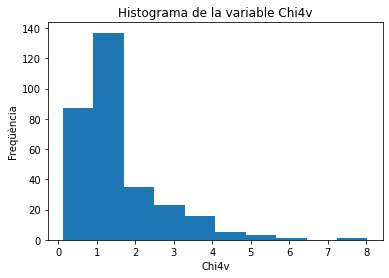

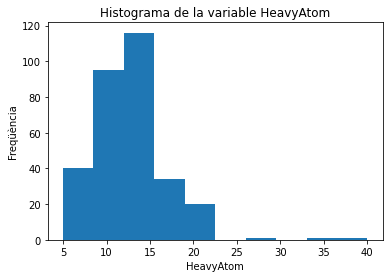

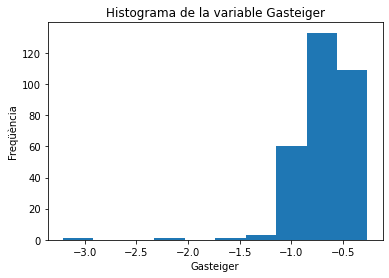

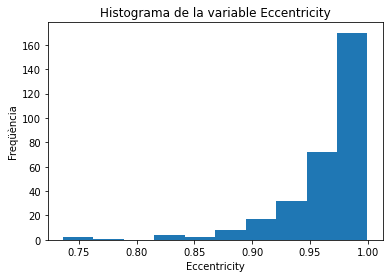

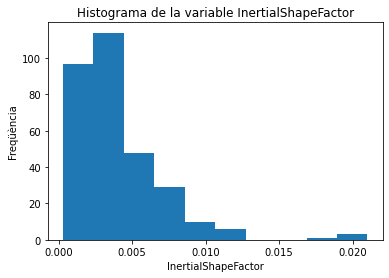

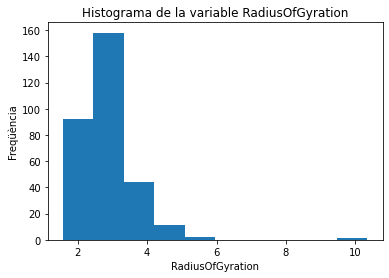

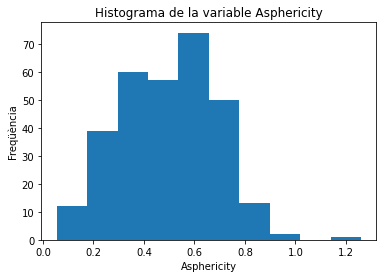

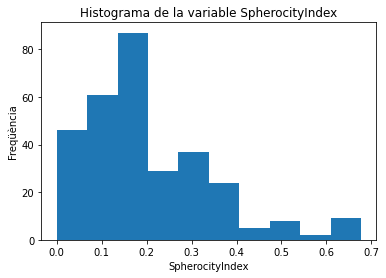

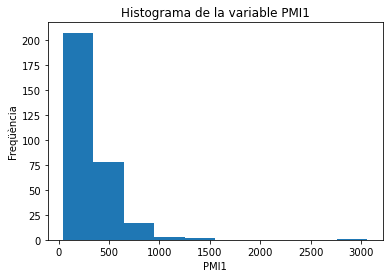

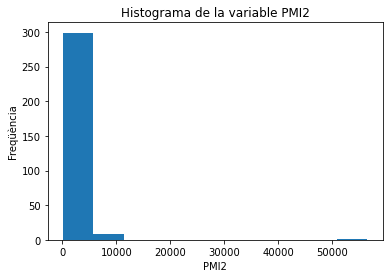

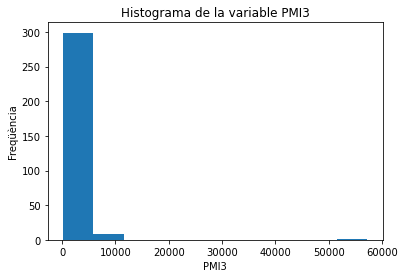

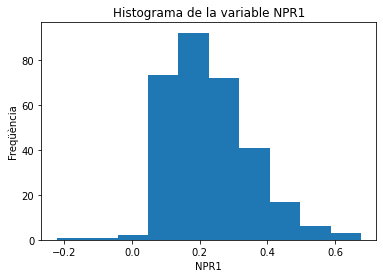

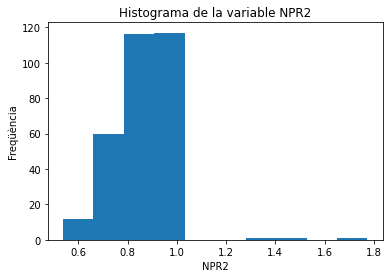

In [43]:
for i in ind_X:
    plt.hist(odor0[i])
    plt.title('Histograma de la variable ' + str(i))
    plt.xlabel(str(i))
    plt.ylabel('Freqüència')
    plt.show()

#### Label == 0

In [28]:
odor0 = odor[odor['label']==0]
df=odor0[ind_X]

(array([132., 153.,  17.,   3.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.   ,  20.622,  41.244,  61.866,  82.488, 103.11 , 123.732,
        144.354, 164.976, 185.598, 206.22 ]),
 <BarContainer object of 10 artists>)

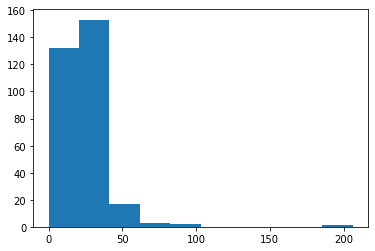

In [ ]:
distribucion = stats.norm

parametros = distribucion.fit(data=df)

nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

#### Label == 1

#### Label == 2

In [46]:
odor[odor['label']==2].sample(frac=0.41)

,name,level,cid,label,smiles,TPSA,MolLogP,MolWt,ExactMolWt,MolMR,...,Class,Subclass,Intermediate Nodes,Direct Parent,Alternative Parents,Molecular Framework,Substituents,Structure-based description,Ancestors,External Descriptors
5088,orange,first,95016,2,CCCOC(=O)C1=CC=CC=C1N,52.32,1.83560,179.219,179.094629,51.4279,...,None,None,None,None,None,None,None,None,None,None
10222,floral,first,19165,2,CC1=CC(=CC=C1)OC2=CC=CC=C2,9.23,3.78732,184.238,184.088815,57.6950,...,None,None,None,None,None,None,None,None,None,None
5096,orange,first,16899,2,CCCCCC=CC=CC=O,17.07,2.87800,152.237,152.120115,48.4860,...,Organooxygen compounds,Carbonyl compounds,Aldehydes,Medium-chain aldehydes,Enals Organic oxides Hydrocarbon derivatives,Aliphatic acyclic compounds,Medium-chain aldehyde Enal Alpha,beta-unsaturated aldehyde Organic oxide Hydroc...,This compound belongs to the class of organic...,Aldehydes Alpha
6066,musk,first,66823518,2,CC1C/C=C/CCCCCCCCC(=O)C1,17.07,4.66240,222.372,222.198365,69.4810,...,None,None,None,None,None,None,None,None,None,None
6027,musk,first,174766,2,CC1=CC2=C(C(=C1C=O)OC)C(CCC2(C)C)(C)C,26.30,4.16512,260.377,260.177630,78.4045,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10052,floral,first,61303,2,CCCCCCCCCCCCCC(=O)C,17.07,5.27650,226.404,226.229666,71.7590,...,None,None,None,None,None,None,None,None,None,None
6685,green,first,62375,2,COC(C1=CC=CC=C1)OC,18.46,1.97800,152.193,152.083730,43.2010,...,None,None,None,None,None,None,None,None,None,None
4084,green,first,87166,2,CCCCCCOCC(OC)OC,27.69,2.20220,190.283,190.156895,52.7670,...,Organooxygen compounds,Ethers,,Acetals,Dialkyl ethers Hydrocarbon derivatives,Aliphatic acyclic compounds,Dialkyl ether Acetal Hydrocarbon derivative A...,This compound belongs to the class of organic...,the term was confined to derivatives of aldeh...,but it now applies equally to derivatives of ...
5165,green,first,44145641,2,CC1=C[C@H]2[C@@H]3C[C@H]([C@H]2C1)[C@H](C3=C)O...,26.30,2.70640,218.296,218.130680,61.6450,...,None,None,None,None,None,None,None,None,None,None


#### Label == 3

#### Label == 4

In [40]:
odor[odor['label']==4].sample(frac=0.62)

,name,level,cid,label,smiles,TPSA,MolLogP,MolWt,ExactMolWt,MolMR,...,Class,Subclass,Intermediate Nodes,Direct Parent,Alternative Parents,Molecular Framework,Substituents,Structure-based description,Ancestors,External Descriptors
9232,fruity,first,5366038,4,CCCCCCOC(=O)/C=C/C,26.30,2.6860,170.252,170.130680,49.915,...,None,None,None,None,None,None,None,None,None,None
8361,fruity,first,78879,4,CC(=C)CCOC(=O)C,26.30,1.5157,128.171,128.083730,36.064,...,None,None,None,None,None,None,None,None,None,None
9113,fruity,first,61379,4,CCCCCCOC(=O)CCC1=CC=CC=C1,26.30,3.7427,234.339,234.161980,69.864,...,Fatty Acyls,Fatty acid esters,,Fatty acid esters,Benzene and substituted derivatives Carboxyli...,Aromatic homomonocyclic compounds,Fatty acid ester Benzenoid Monocyclic benzene...,This compound belongs to the class of organic...,Benzene and substituted derivatives Benzenoid...,
9307,fruity,first,24986,4,CCOC(=O)C1CC2CC1C=C2,26.30,1.7617,166.220,166.099380,45.477,...,Carboxylic acids and derivatives,Carboxylic acid derivatives,,Carboxylic acid esters,Monocarboxylic acids and derivatives Organic ...,Aliphatic homopolycyclic compounds,Carboxylic acid ester Monocarboxylic acid or ...,This compound belongs to the class of organic...,Carbonyl compounds Carboxylic acid derivative...,
9181,fruity,first,15701285,4,CCC(C)C(=O)C(=O)CC,34.14,1.5807,142.198,142.099380,39.760,...,Organooxygen compounds,Carbonyl compounds,Ketones,Alpha-diketones,Organic oxides Hydrocarbon derivatives,Aliphatic acyclic compounds,Alpha-diketone Organic oxide Hydrocarbon deri...,This compound belongs to the class of organic...,Alpha-diketones Carbonyl compounds Chemical e...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,fruity,first,6366072,4,CCCCCCOC(=O)C(C)/C=C/C,26.30,3.3221,198.306,198.161980,59.079,...,None,None,None,None,None,None,None,None,None,None
9093,fruity,first,61184,4,CCCC(=O)OC(C)C,26.30,1.7381,130.187,130.099380,36.136,...,Fatty Acyls,Fatty acid esters,,Fatty acid esters,Carboxylic acid esters Monocarboxylic acids a...,Aliphatic acyclic compounds,Fatty acid ester Carboxylic acid ester Monoca...,This compound belongs to the class of organic...,Carbonyl compounds Carboxylic acid derivative...,Wax monoesters (LIPID MAPS
10632,fatty,first,441574,4,CCCCC[C@H]1CCC(=O)O1,26.30,2.2723,156.225,156.115030,43.256,...,None,None,None,None,None,None,None,None,None,None
10791,fatty,first,31278,4,CCCCCCCCCCCCCCCCCC(=O)OCCCC,26.30,7.5912,340.592,340.334131,105.413,...,Fatty Acyls,Fatty acid esters,,Fatty acid esters,Carboxylic acid esters Monocarboxylic acids a...,Aliphatic acyclic compounds,Fatty acid ester Carboxylic acid ester Monoca...,This compound belongs to the class of organic...,Carbonyl compounds Carboxylic acid derivative...,fatty acid ester (CHEBI


#### Label == 5